# Oral Health Risk Analysis
This notebook performs a full analysis on a dataset with encoded features for dental and dietary health.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal, chi2_contingency
from pandas.api.types import is_numeric_dtype
from warnings import filterwarnings
filterwarnings('ignore')
from IPython.display import display

In [2]:
# Load the data
df = pd.read_csv('training_data.csv')
df.shape, df.columns.tolist()

((25000, 69),
 ['has_dental_data',
  'has_dietary_data',
  'sa_citizen',
  'special_needs',
  'caregiver_treatment',
  'appliance',
  'plaque',
  'dry_mouth',
  'enamel_defects',
  'fluoride_water',
  'fluoride_toothpaste',
  'topical_fluoride',
  'regular_checkups',
  'sealed_pits',
  'restorative_procedures',
  'enamel_change',
  'dentin_discoloration',
  'white_spot_lesions',
  'cavitated_lesions',
  'multiple_restorations',
  'missing_teeth',
  'total_dmft_score',
  'sweet_sugary_foods',
  'sweet_sugary_foods_bedtime',
  'takeaways_processed_foods',
  'fresh_fruit',
  'fresh_fruit_bedtime',
  'cold_drinks_juices',
  'cold_drinks_juices_bedtime',
  'processed_fruit',
  'processed_fruit_bedtime',
  'spreads',
  'spreads_bedtime',
  'added_sugars',
  'added_sugars_bedtime',
  'salty_snacks',
  'dairy_products',
  'vegetables',
  'water',
  'sweet_sugary_foods_daily',
  'sweet_sugary_foods_weekly',
  'sweet_sugary_foods_timing',
  'takeaways_processed_foods_daily',
  'takeaways_process

## Correlation Matrix and Heatmap

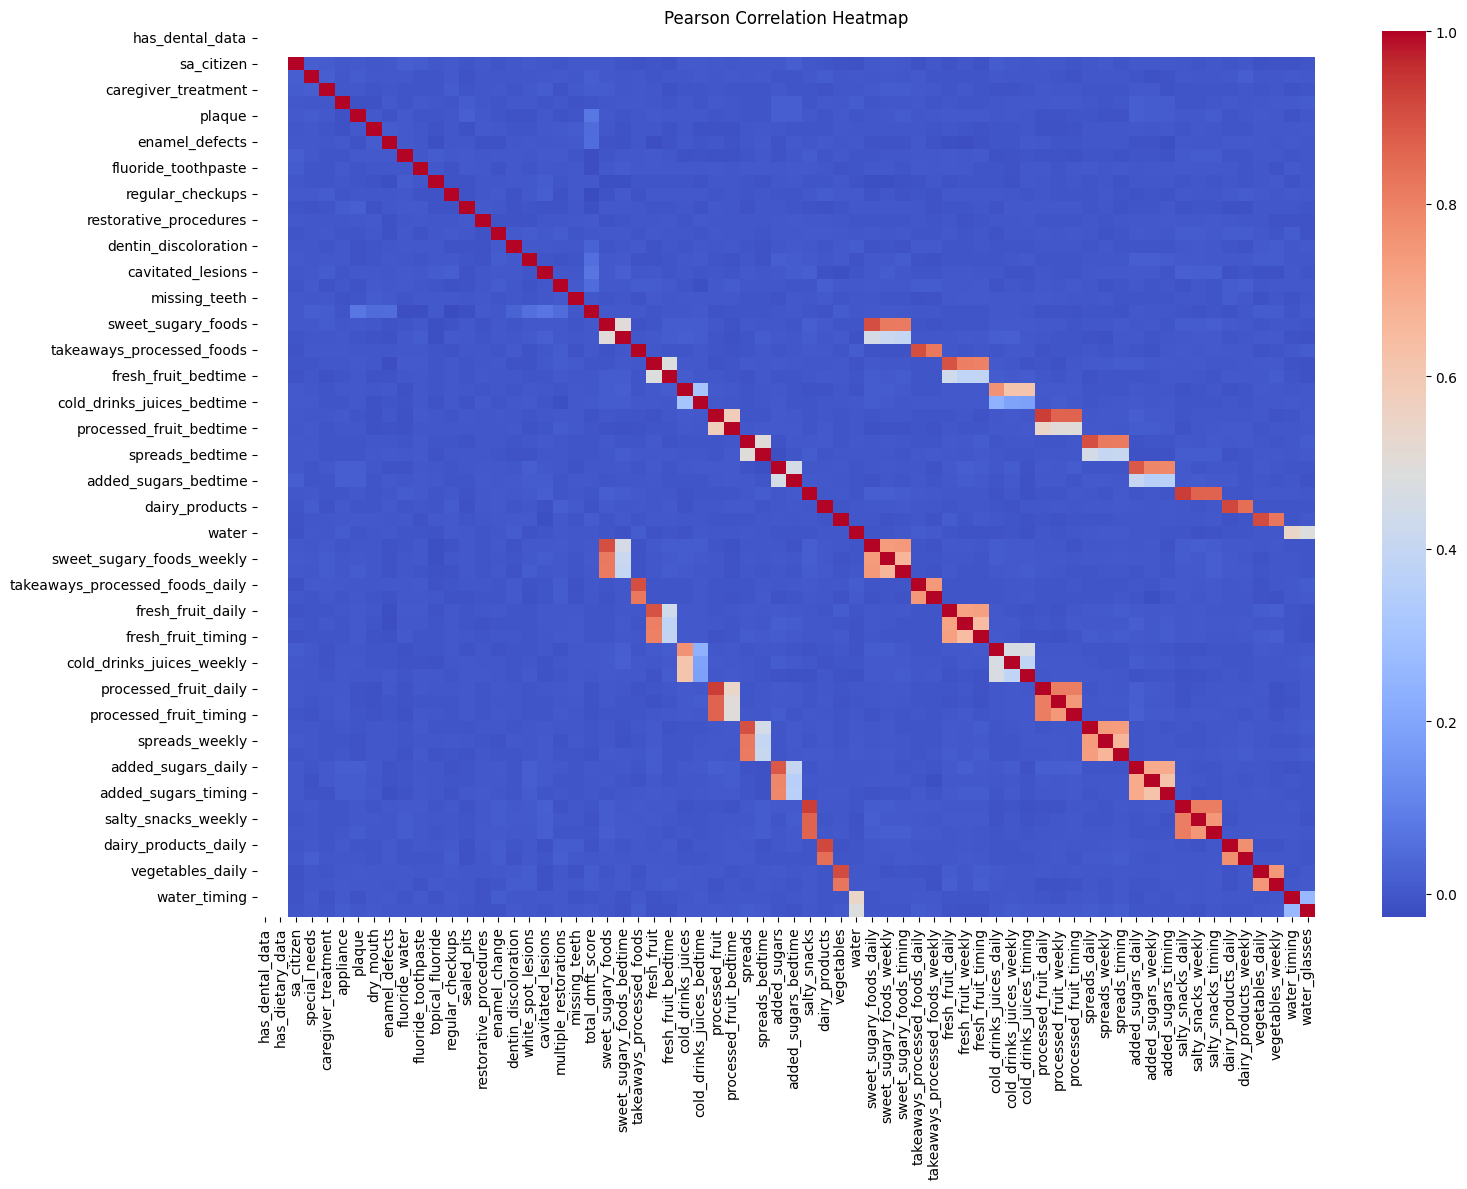

In [3]:
# Only use numeric columns
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

## Distribution Plots

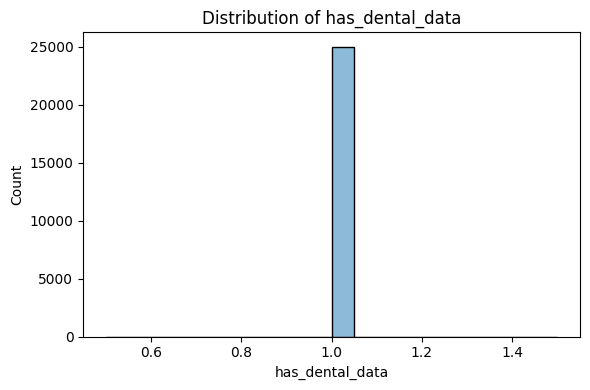

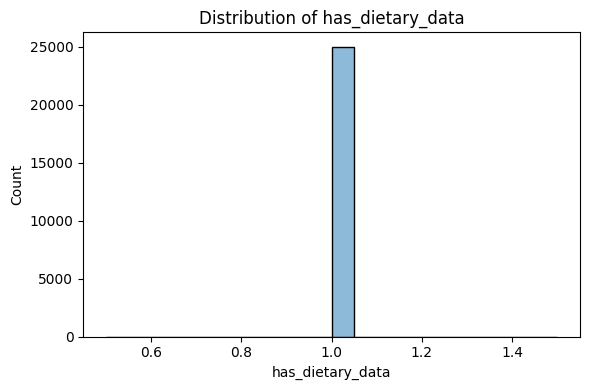

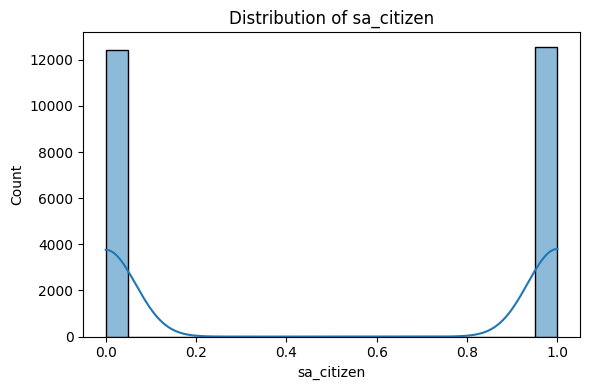

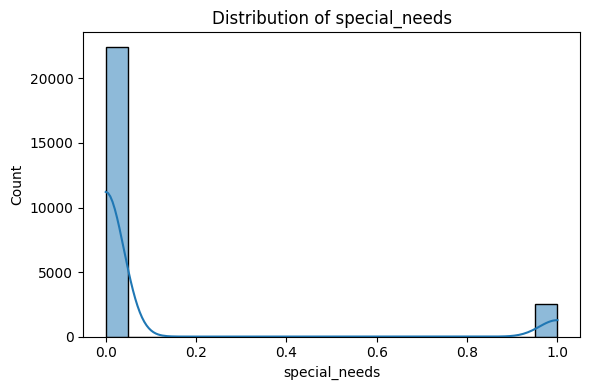

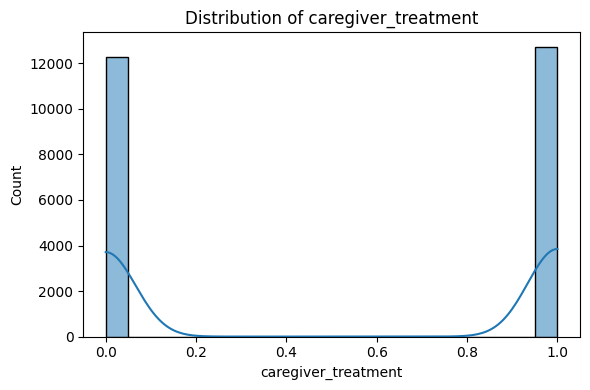

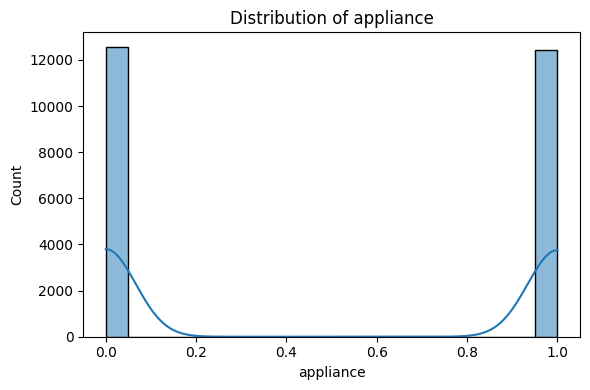

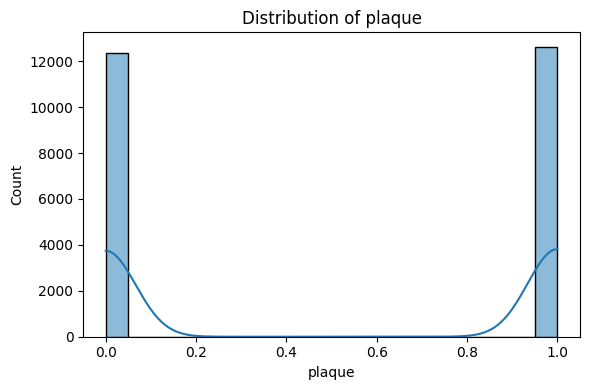

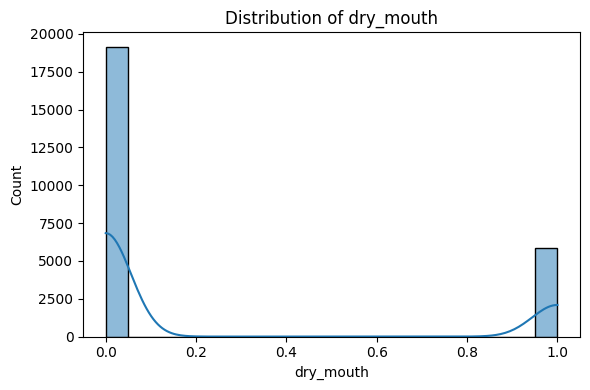

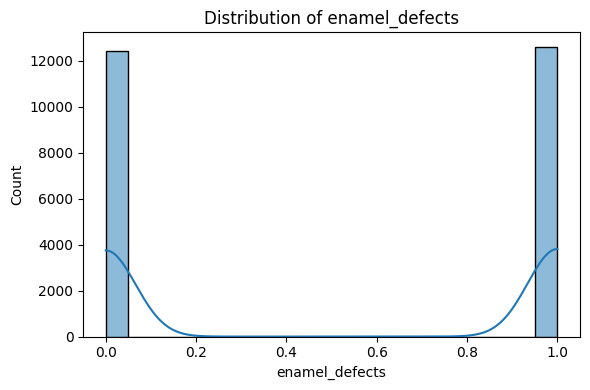

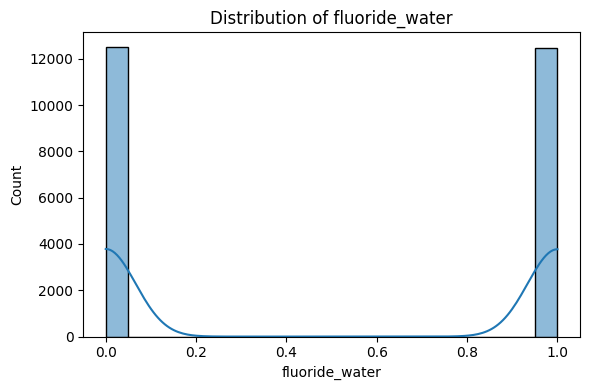

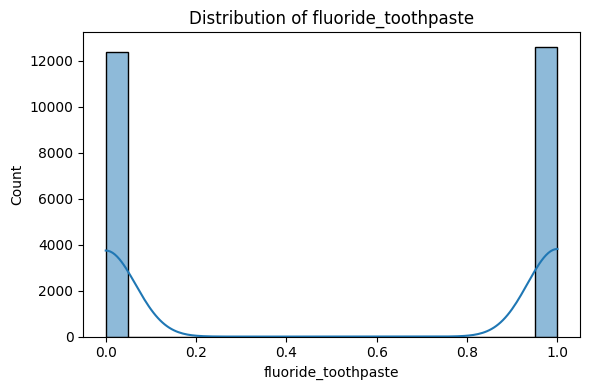

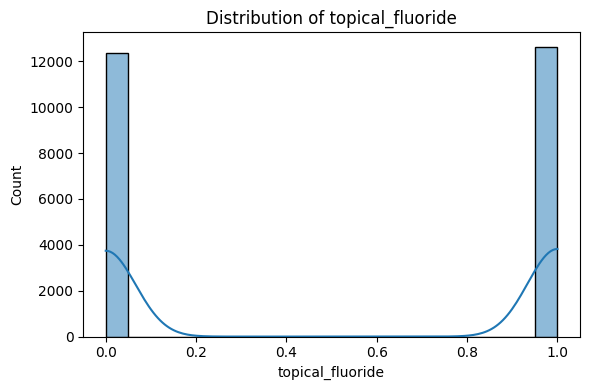

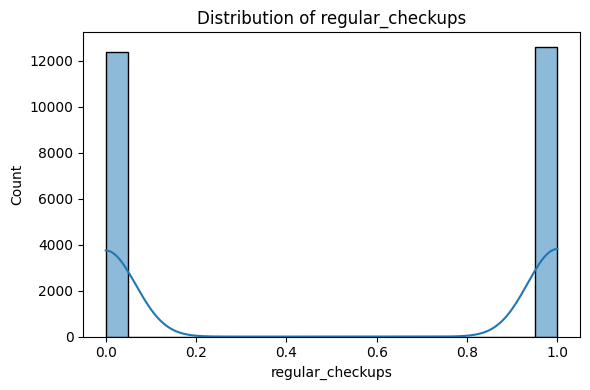

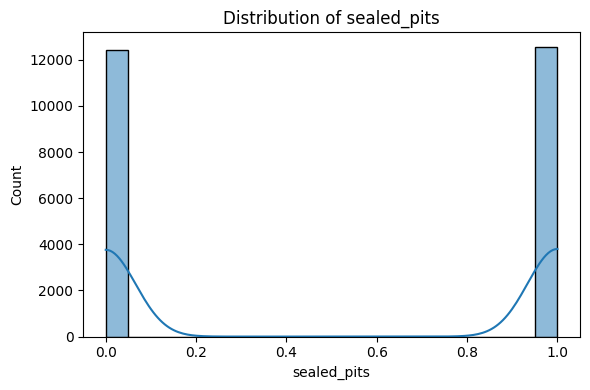

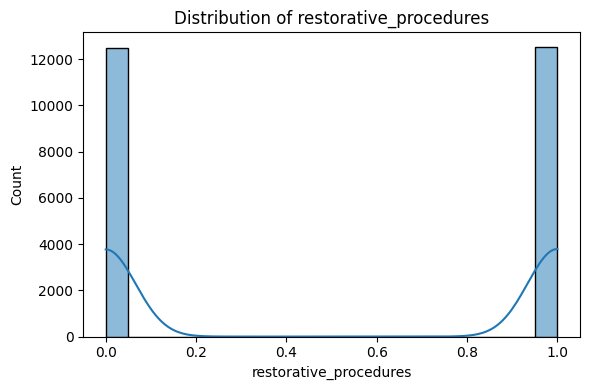

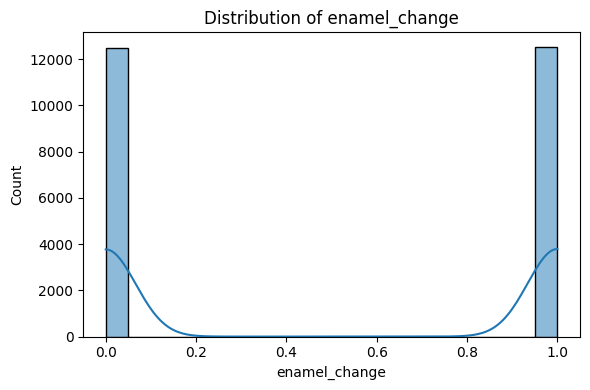

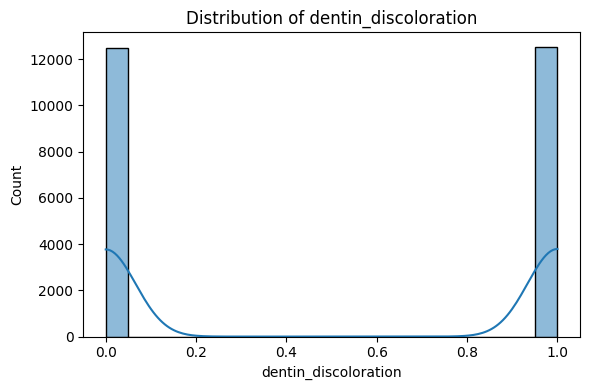

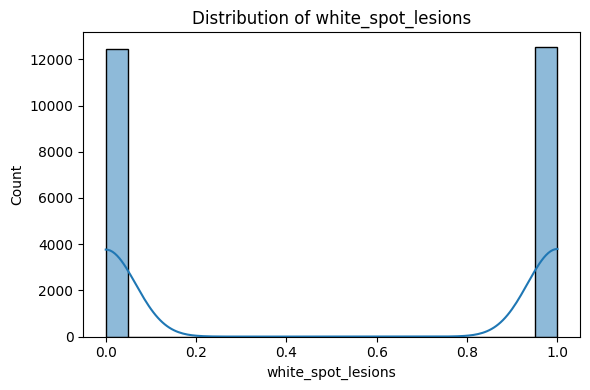

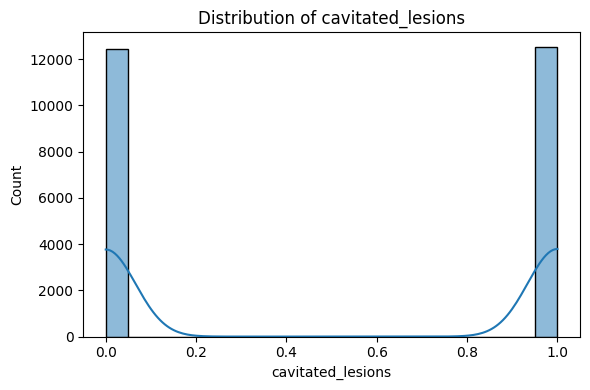

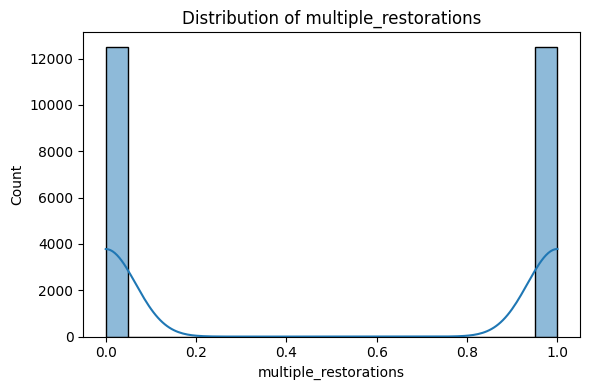

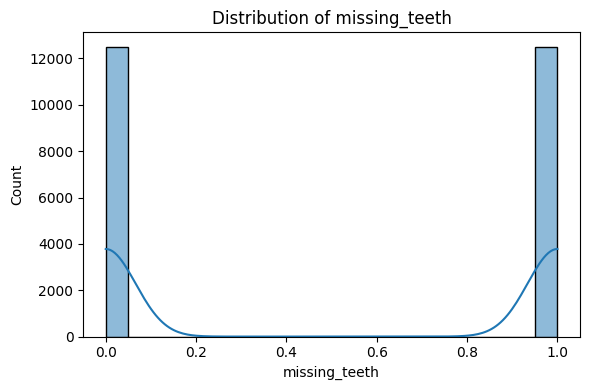

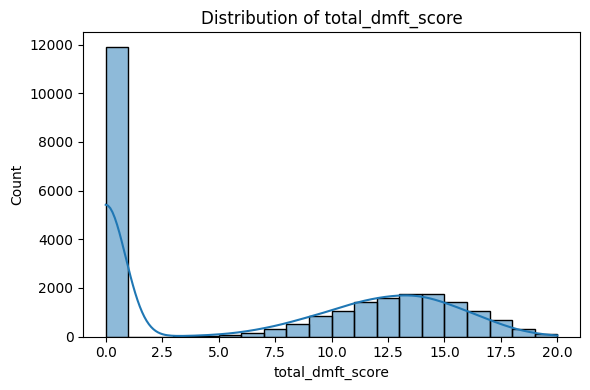

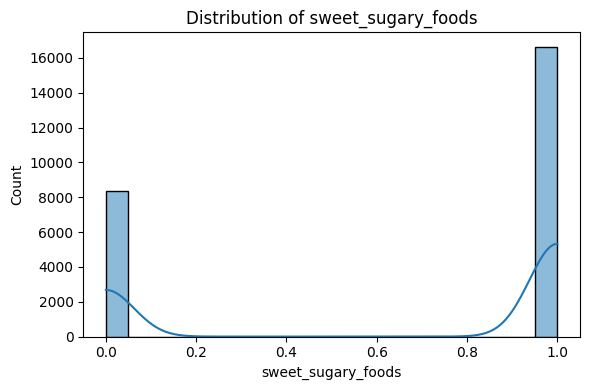

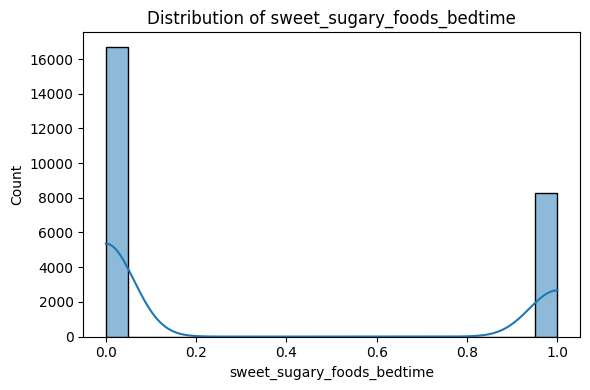

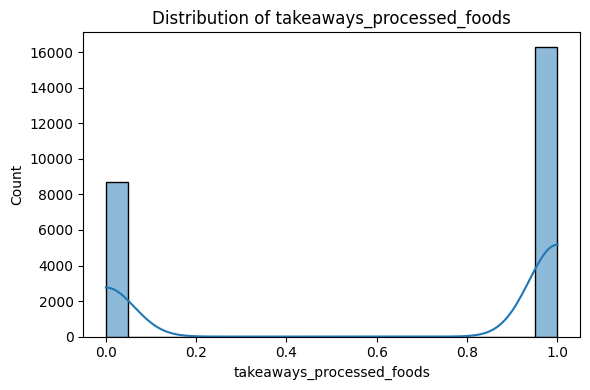

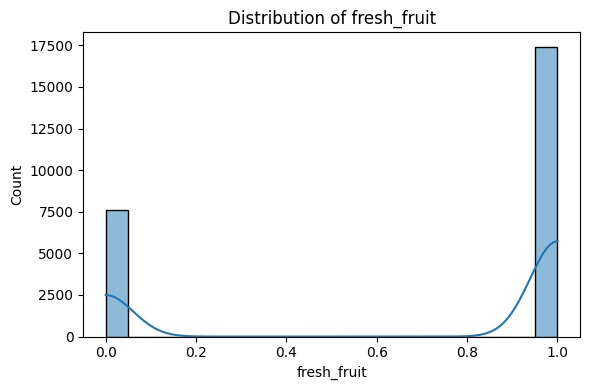

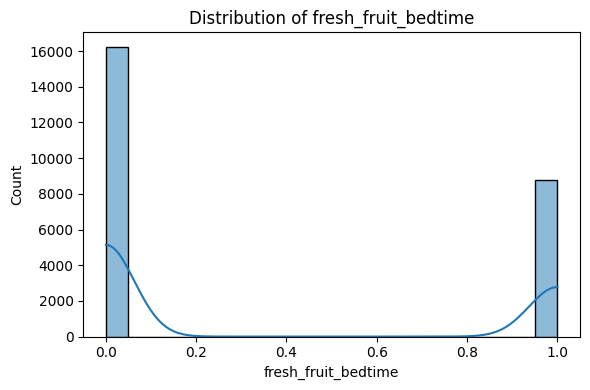

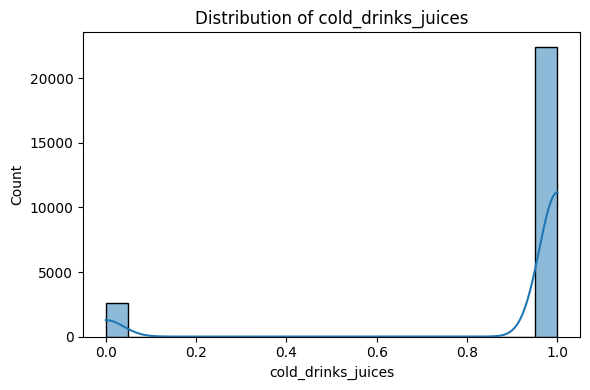

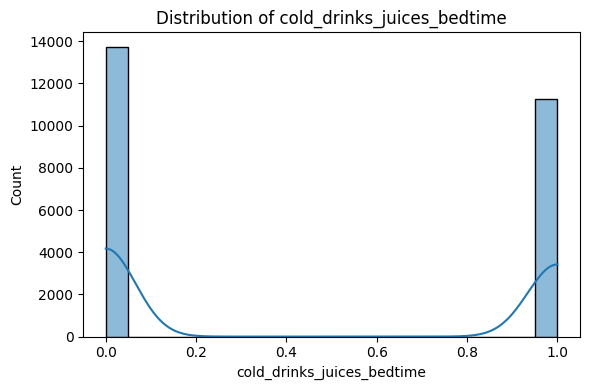

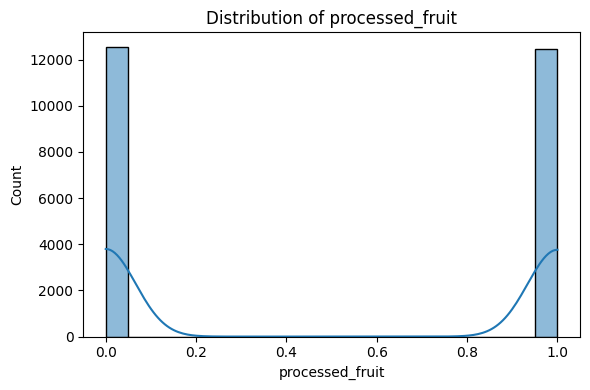

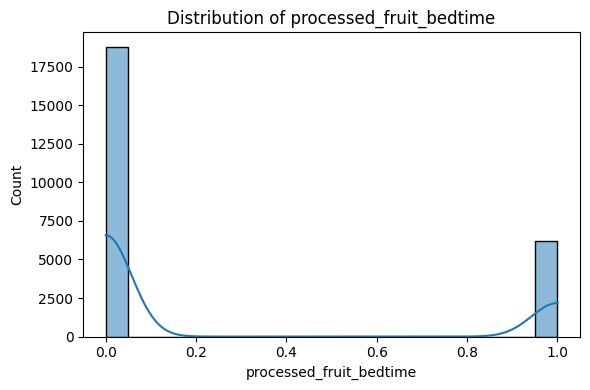

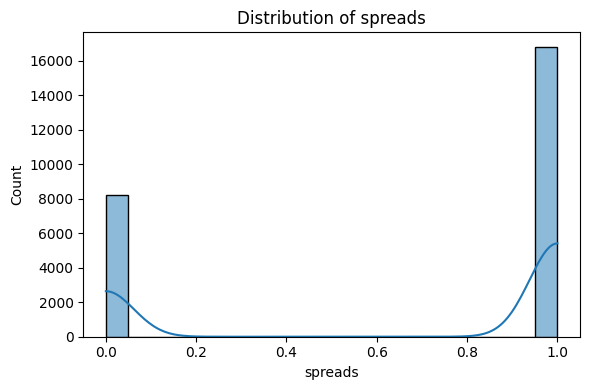

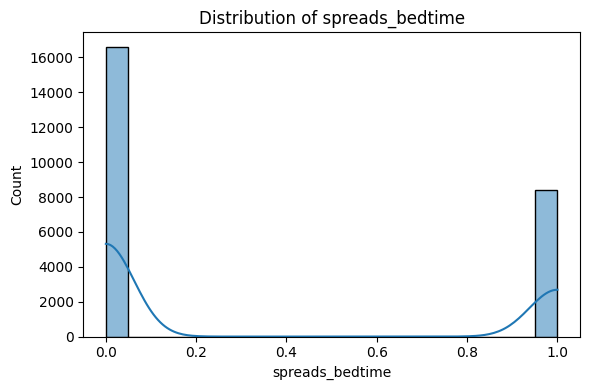

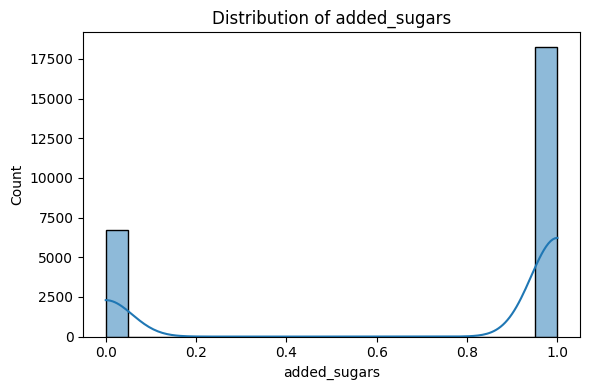

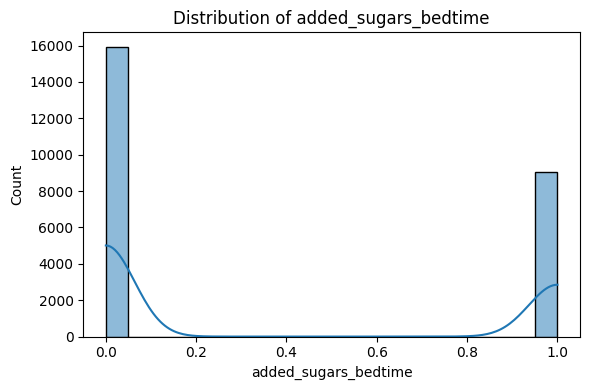

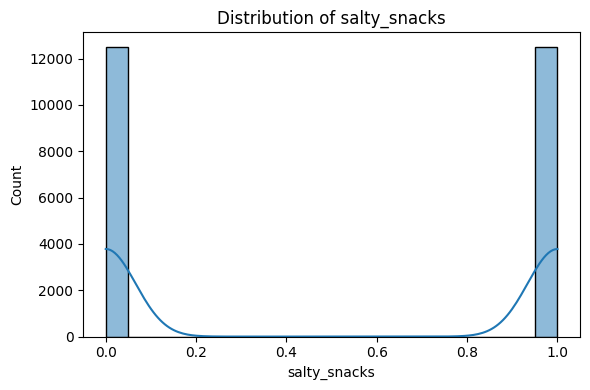

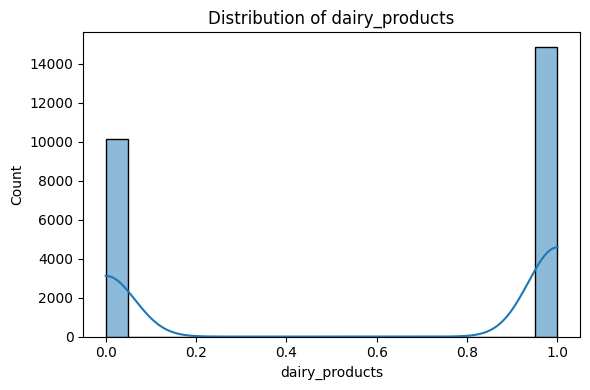

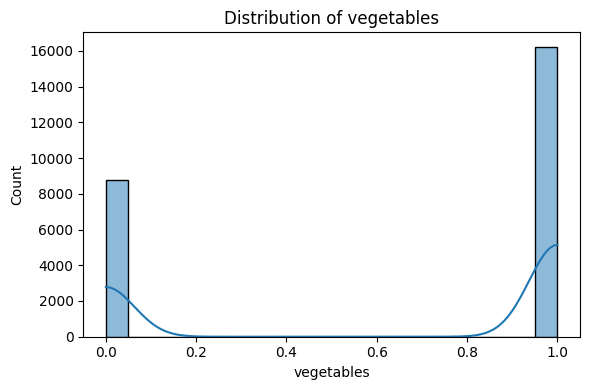

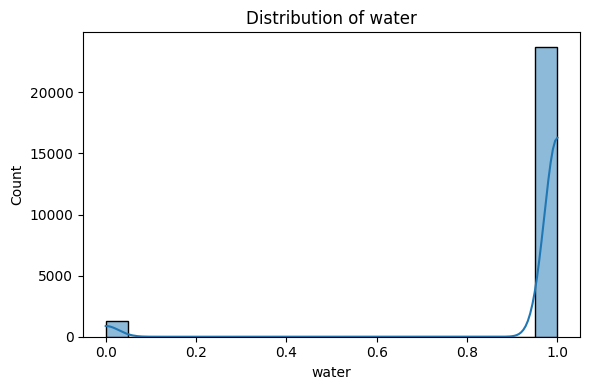

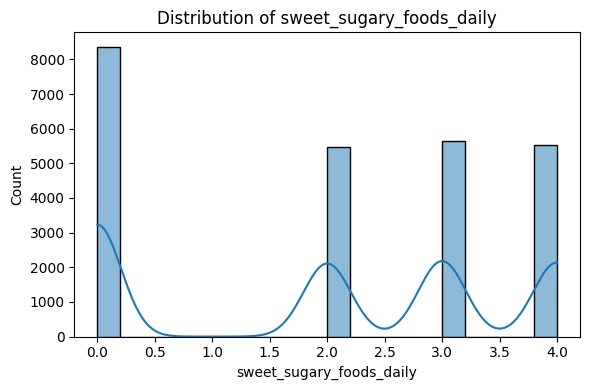

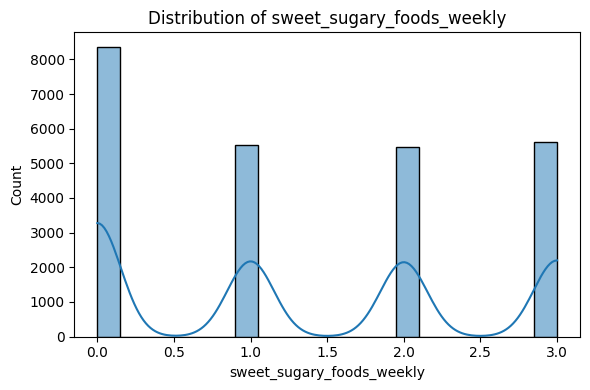

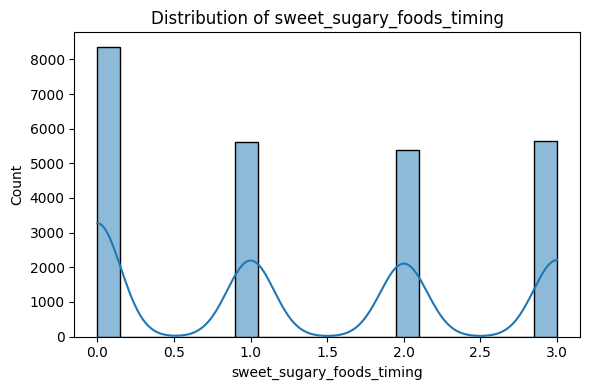

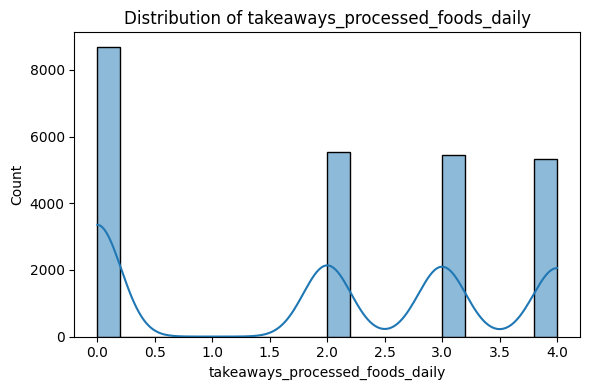

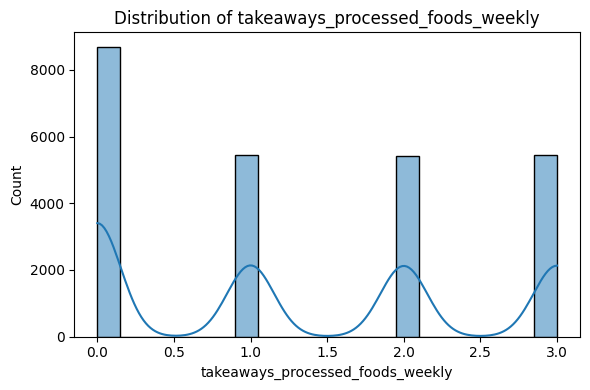

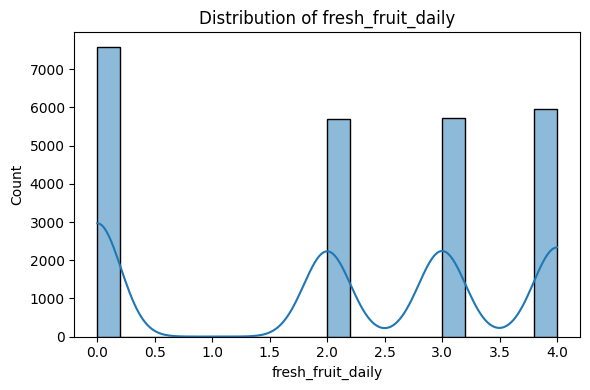

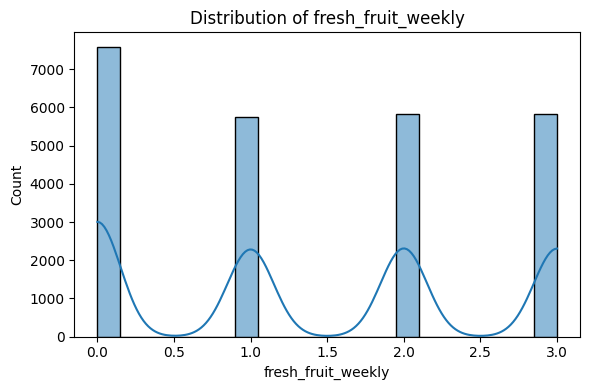

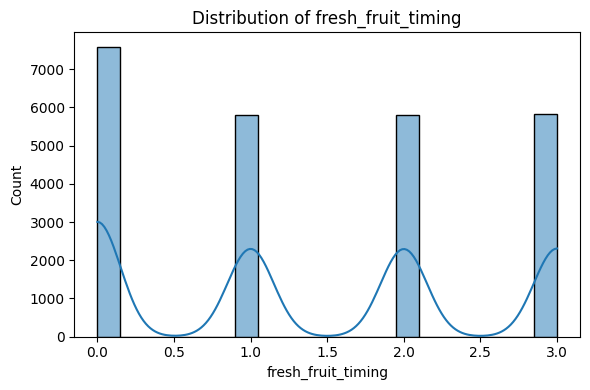

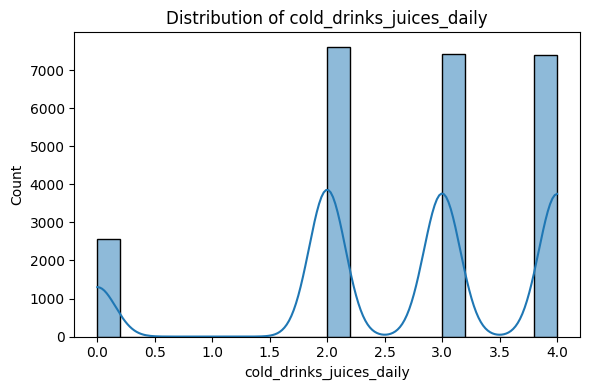

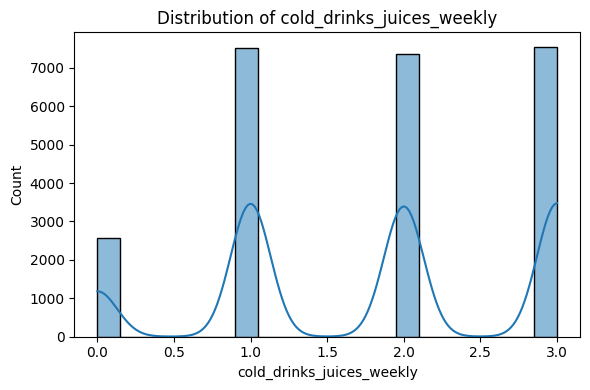

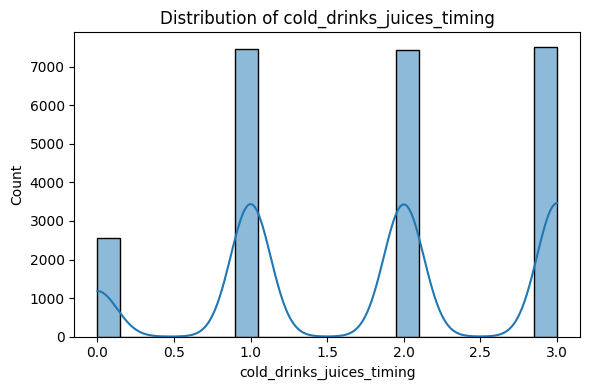

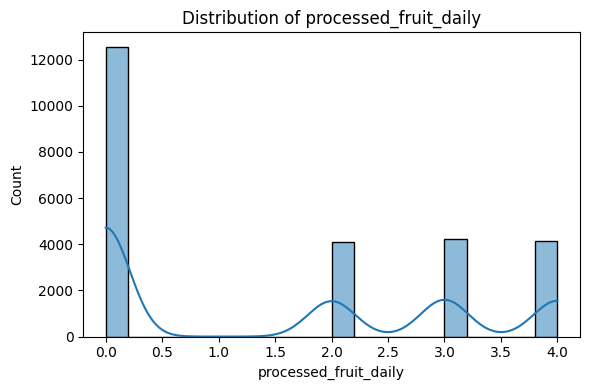

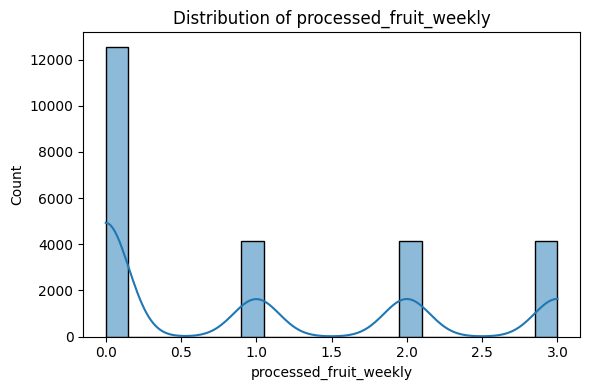

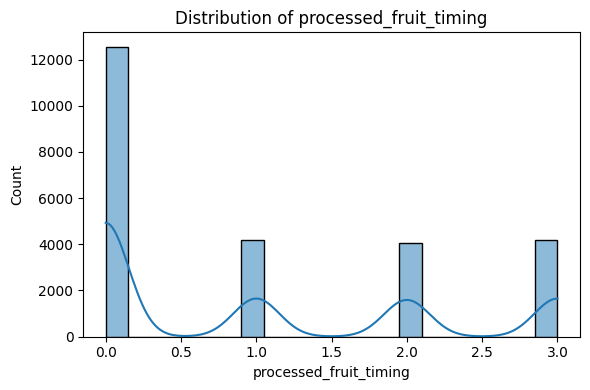

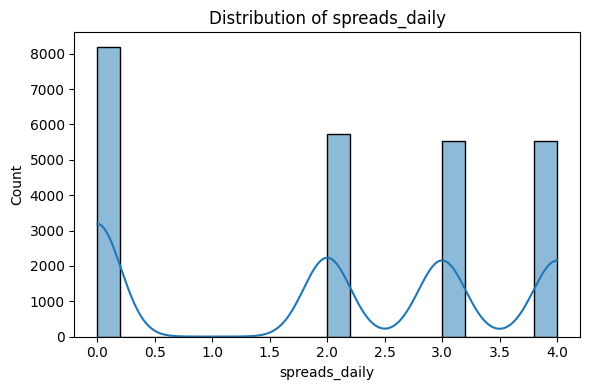

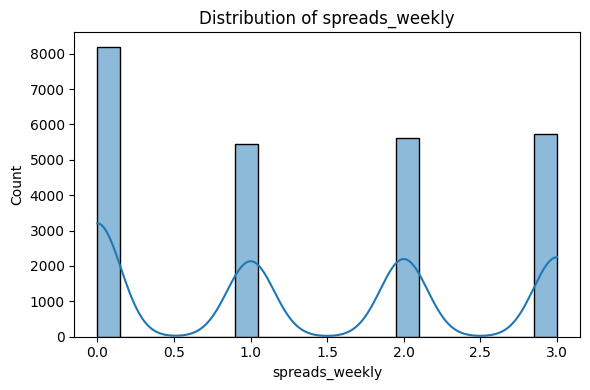

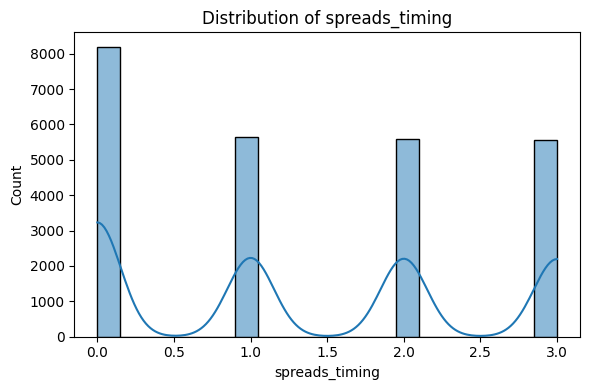

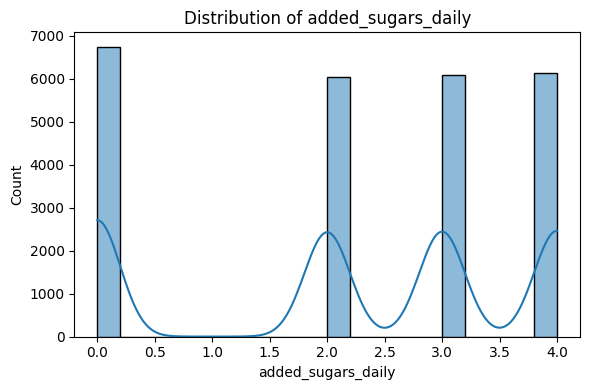

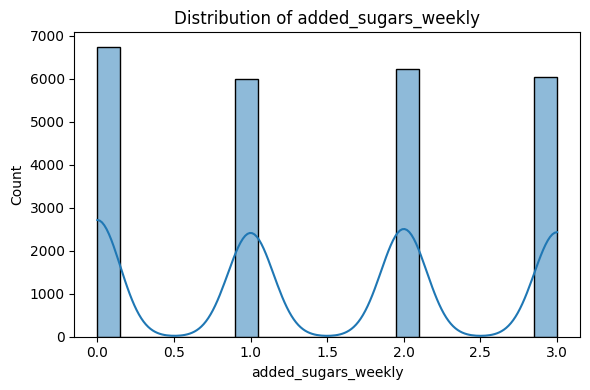

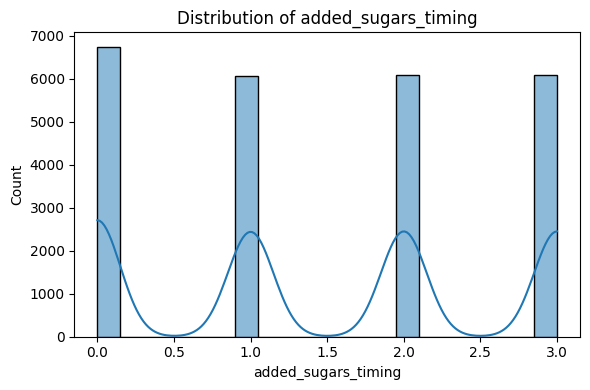

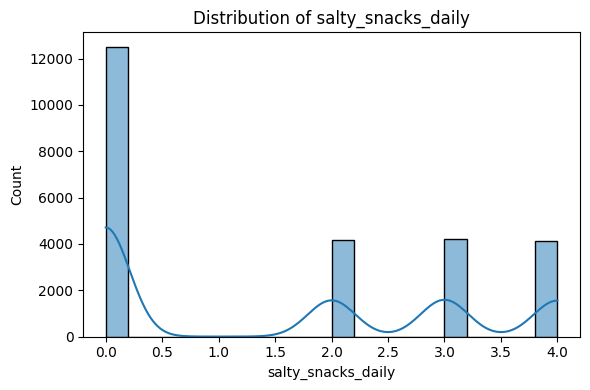

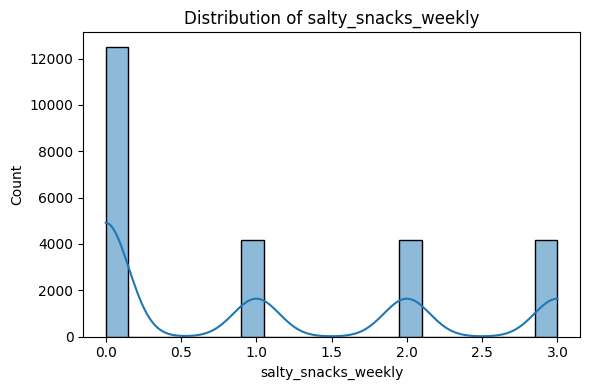

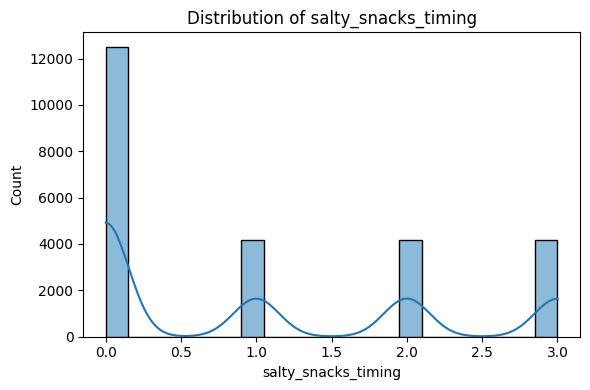

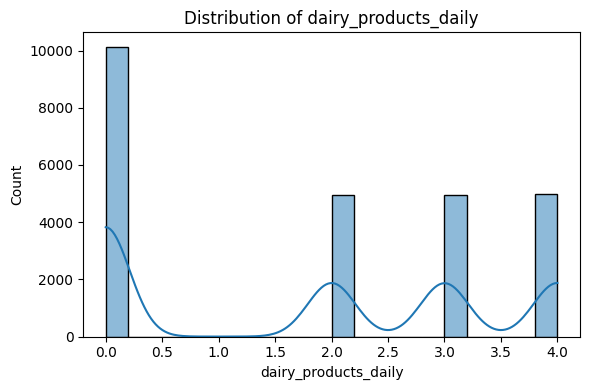

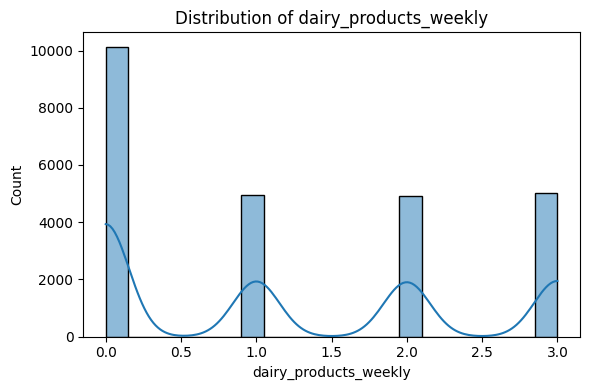

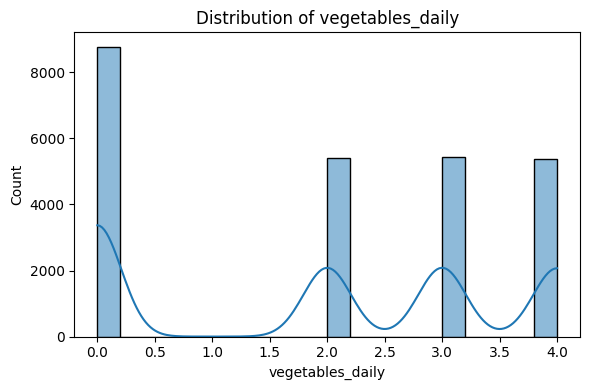

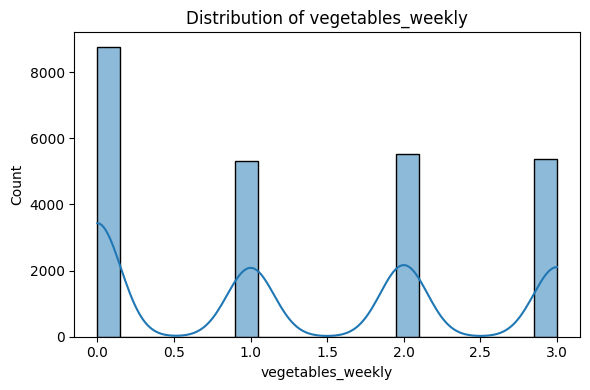

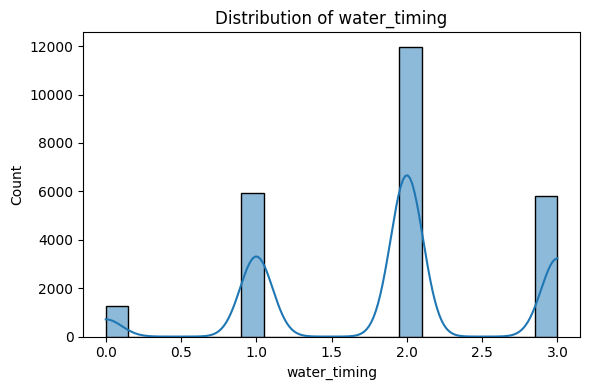

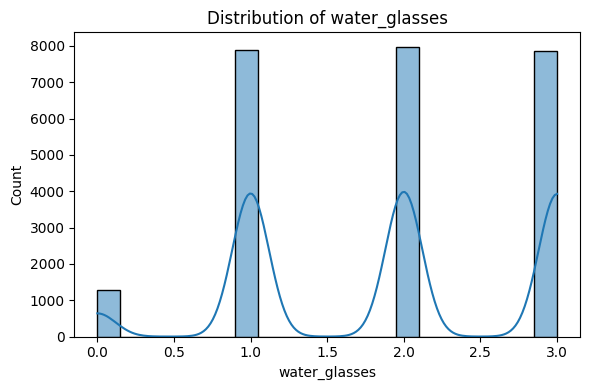

In [4]:
for column in numeric_df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()

## Statistical Tests Against Risk Level

In [5]:
risk_groups = df['risk_level'].unique()
results = []

for column in df.columns:
    if column == 'risk_level':
        continue

    try:
        if is_numeric_dtype(df[column]):
            groups = [df[df['risk_level'] == level][column].dropna() for level in risk_groups]
            # Skip if all values in all groups are constant
            if all(group.nunique() <= 1 for group in groups):
                continue
            stat, p = kruskal(*groups)
            results.append((column, 'Kruskal-Wallis', p))
        else:
            contingency = pd.crosstab(df[column], df['risk_level'])
            if contingency.shape[0] < 2 or contingency.shape[1] < 2:
                continue
            chi2, p, _, _ = chi2_contingency(contingency)
            results.append((column, 'Chi-square', p))
    except Exception as e:
        print(f"Skipping {column} due to error: {e}")


## Summary Table with p-values

In [6]:
summary_df = pd.DataFrame(results, columns=['Variable', 'Test', 'p-value'])
summary_df['Significant (<0.05)'] = summary_df['p-value'] < 0.05
summary_df.sort_values(by='p-value', inplace=True)
summary_df

,Variable,Test,p-value,Significant (<0.05)
19,total_dmft_score,Kruskal-Wallis,0.000000e+00,True
17,multiple_restorations,Kruskal-Wallis,3.779609e-133,True
16,cavitated_lesions,Kruskal-Wallis,1.163882e-119,True
15,white_spot_lesions,Kruskal-Wallis,6.398657e-114,True
13,enamel_change,Kruskal-Wallis,8.915433e-108,True
...,...,...,...,...
24,fresh_fruit_bedtime,Kruskal-Wallis,1.309683e-01,False
0,sa_citizen,Kruskal-Wallis,1.457643e-01,False
12,restorative_procedures,Kruskal-Wallis,4.327768e-01,False
3,appliance,Kruskal-Wallis,4.572027e-01,False


In [7]:
display(summary_df)

,Variable,Test,p-value,Significant (<0.05)
19,total_dmft_score,Kruskal-Wallis,0.000000e+00,True
17,multiple_restorations,Kruskal-Wallis,3.779609e-133,True
16,cavitated_lesions,Kruskal-Wallis,1.163882e-119,True
15,white_spot_lesions,Kruskal-Wallis,6.398657e-114,True
13,enamel_change,Kruskal-Wallis,8.915433e-108,True
...,...,...,...,...
24,fresh_fruit_bedtime,Kruskal-Wallis,1.309683e-01,False
0,sa_citizen,Kruskal-Wallis,1.457643e-01,False
12,restorative_procedures,Kruskal-Wallis,4.327768e-01,False
3,appliance,Kruskal-Wallis,4.572027e-01,False


In [8]:
print(summary_df.to_string())

                            Variable            Test        p-value  Significant (<0.05)
19                  total_dmft_score  Kruskal-Wallis   0.000000e+00                 True
17             multiple_restorations  Kruskal-Wallis  3.779609e-133                 True
16                 cavitated_lesions  Kruskal-Wallis  1.163882e-119                 True
15                white_spot_lesions  Kruskal-Wallis  6.398657e-114                 True
13                     enamel_change  Kruskal-Wallis  8.915433e-108                 True
4                             plaque  Kruskal-Wallis  8.928555e-108                 True
14              dentin_discoloration  Kruskal-Wallis  1.901453e-107                 True
6                     enamel_defects  Kruskal-Wallis  6.647258e-105                 True
18                     missing_teeth  Kruskal-Wallis   8.202003e-87                 True
5                          dry_mouth  Kruskal-Wallis   1.435574e-76                 True
32              added